<h1 style="font-size:3em; text-align: center">Multi-Step Forecasting With Keras LSTM Neural Network</h1>


In [ ]:
# imports
import numpy             as np
import matplotlib.pyplot as plt
import pandas            as pd
import math
import keras

# jupyter command - allows plots to show up
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics       import mean_squared_error
from datetime import datetime

# fixes the random number seed to ensure reproducible results
np.random.seed(69)

In [75]:
ads = pd.read_csv('data/ads.csv', index_col=['Time'], parse_dates=['Time'])
currency = pd.read_csv('data/currency.csv', index_col=['Time'], parse_dates=['Time'])

In [76]:
ads.shape

(216, 1)

In [77]:
# number of inputs to be fed
look_back = 48
# number of outputs to be generated
look_forward = 24

## Imports the Same Dataset as The Other Models

## Manipulates the Dataset and Splits the Dataset

In [78]:
ads = ads.values
ads = ads.astype("float32")

In [83]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(ads)

# split into train and test sets
train_size = 48*3
test_size = len(dataset) - train_size
test, train = dataset[0:test_size,:], dataset[test_size:len(dataset)-look_forward,:]

In [84]:
len(test)

72

## create_dataset()

This function, given a dataset and optionally a look_back variable will generate two matrices. The first will be a matrix with all of the inputs for multiple training sets. The second will be a matrix with the output(s) that the LSTM should have.

<table>
    <tr>
        <th style='text-align: left'>Variables</th>
        <th style='text-align: left'>Description</th>
    </tr>
    <tr>
        <td style='text-align:left'><b>dataset</b></td> 
        <td style='text-align:left'>The dataset which will be split into two input and output matrices</td>
    </tr>
    <tr>
        <td style='text-align:left'><b>look_back</b></td>
        <td style='text-align:left'>(Def = 1) This variable determines how many inputs will be in each row of the input matrix. </td>
    </tr>
</table>

In [85]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1, look_forward=2):
    dataX, dataY = [], []
    np.array(dataY)
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        if len(dataset[i + look_back:i+look_back+look_forward, 0]) == look_forward:
            dataX.append(a)
            dataY.append(dataset[i + look_back:i+look_back+look_forward, 0])
    return np.array(dataX), np.array(dataY)

## Uses the Above Function to Create the Training and Test Sets and Reshapes them

### trainX and testX

A matrix where each row is an array of the input(s) depending on look_back

### trainY and testY

A matrix where each row is an array of the desired output(s)

In [86]:
# reshape into X=[t, t-1, t-2,..., t-look_back] and Y=[t+1, t+2,... t+look_forward]
trainX, trainY = create_dataset(train, look_back, look_forward)
testX, testY = create_dataset(test, look_back, look_forward)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


## Generates and Trains an LSTM Neural Network with Keras

The model consists of a chain of 4 LSTM Neurons and a Dense layer with an output of 1. The input shape is an matrix with one row and as many features as the look_back variable describes. In other words, this model takes the some number of inputs (depending on look_back) and will return a single output.

The model is then fit using the training set, with a batch_size of 3 and 5 epochs. This fitting process can be done but runs the risk of over-fitting the LSTM Network.

In [87]:
# create and fit the LSTM network
model = Sequential()
## six is just neurons, does it matter, order ? 
model.add(LSTM(6, input_shape=(1, look_back)))
## I like this a lot, just multiply out for nodes
model.add(Dense(look_forward*3))
model.add(Dense(look_forward*2))
model.add(Dense(look_forward))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=3, verbose=2)

Epoch 1/5
 - 1s - loss: 0.2331
Epoch 2/5
 - 0s - loss: 0.0955
Epoch 3/5
 - 0s - loss: 0.0694
Epoch 4/5
 - 0s - loss: 0.0627
Epoch 5/5
 - 0s - loss: 0.0540


In [28]:
## This is the fitting process but can overfit
batch = 3
for i in range (30):
    model.fit(trainX, trainY, epochs=1, batch_size=batch, verbose=2)

Epoch 1/1
 - 0s - loss: 0.0590
Epoch 1/1
 - 0s - loss: 0.0491
Epoch 1/1
 - 0s - loss: 0.0410
Epoch 1/1
 - 0s - loss: 0.0328
Epoch 1/1
 - 0s - loss: 0.0287
Epoch 1/1
 - 0s - loss: 0.0274
Epoch 1/1
 - 0s - loss: 0.0263
Epoch 1/1
 - 0s - loss: 0.0244
Epoch 1/1
 - 0s - loss: 0.0240
Epoch 1/1
 - 0s - loss: 0.0243
Epoch 1/1
 - 0s - loss: 0.0233
Epoch 1/1
 - 0s - loss: 0.0226
Epoch 1/1
 - 0s - loss: 0.0228
Epoch 1/1
 - 0s - loss: 0.0218
Epoch 1/1
 - 0s - loss: 0.0213
Epoch 1/1
 - 0s - loss: 0.0214
Epoch 1/1
 - 0s - loss: 0.0204
Epoch 1/1
 - 0s - loss: 0.0204
Epoch 1/1
 - 0s - loss: 0.0199
Epoch 1/1
 - 0s - loss: 0.0190
Epoch 1/1
 - 0s - loss: 0.0190
Epoch 1/1
 - 0s - loss: 0.0189
Epoch 1/1
 - 0s - loss: 0.0188
Epoch 1/1
 - 0s - loss: 0.0185
Epoch 1/1
 - 0s - loss: 0.0189
Epoch 1/1
 - 0s - loss: 0.0181
Epoch 1/1
 - 0s - loss: 0.0183
Epoch 1/1
 - 0s - loss: 0.0175
Epoch 1/1
 - 0s - loss: 0.0177
Epoch 1/1
 - 0s - loss: 0.0174


In [88]:
batch = 1
for i in range (20):
    if i % 5 == 0:
        print(i)
    model.fit(trainX, trainY, epochs=1, batch_size=batch, verbose=2)

0
Epoch 1/1
 - 0s - loss: 0.0457
Epoch 1/1
 - 0s - loss: 0.0321
Epoch 1/1
 - 0s - loss: 0.0280
Epoch 1/1
 - 0s - loss: 0.0268
Epoch 1/1
 - 0s - loss: 0.0255
5
Epoch 1/1
 - 0s - loss: 0.0250
Epoch 1/1
 - 0s - loss: 0.0242
Epoch 1/1
 - 0s - loss: 0.0238
Epoch 1/1
 - 0s - loss: 0.0225
Epoch 1/1
 - 0s - loss: 0.0219
10
Epoch 1/1
 - 0s - loss: 0.0220
Epoch 1/1
 - 0s - loss: 0.0205
Epoch 1/1
 - 0s - loss: 0.0193
Epoch 1/1
 - 0s - loss: 0.0190
Epoch 1/1
 - 0s - loss: 0.0176
15
Epoch 1/1
 - 0s - loss: 0.0164
Epoch 1/1
 - 0s - loss: 0.0155
Epoch 1/1
 - 0s - loss: 0.0148
Epoch 1/1
 - 0s - loss: 0.0145
Epoch 1/1
 - 0s - loss: 0.0140


In [30]:
def predictNext2Hours (model, dataset):
    dataset = np.array(dataset)
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    dataset = dataset.transpose()
    dataset = dataset.reshape(-1, 1)
    dataset = scaler.fit_transform(dataset)
    dataset = dataset.transpose()
    
    # reshape the dataset
    data = dataset.T
    data = data.reshape(1, 1, data.shape[0])
    
    # make a prediction
    prediction = model.predict(data)
    
    # un-normalize the data set
    prediction = scaler.inverse_transform(prediction)
    
    return prediction

In [95]:
def predictAt(point):
    pred = predictNext2Hours (model, ads[point-look_back:point].reshape(look_back))
    actu = ads[point:point+look_forward]
    plt.plot(pred.reshape(look_forward))
    plt.plot(actu)
    plt.show()

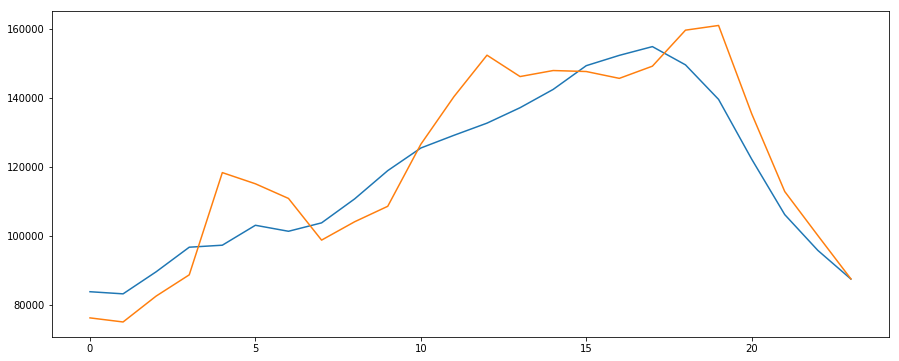

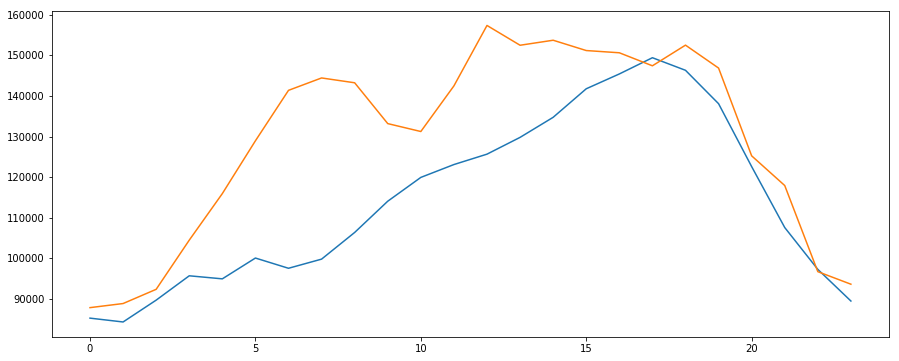

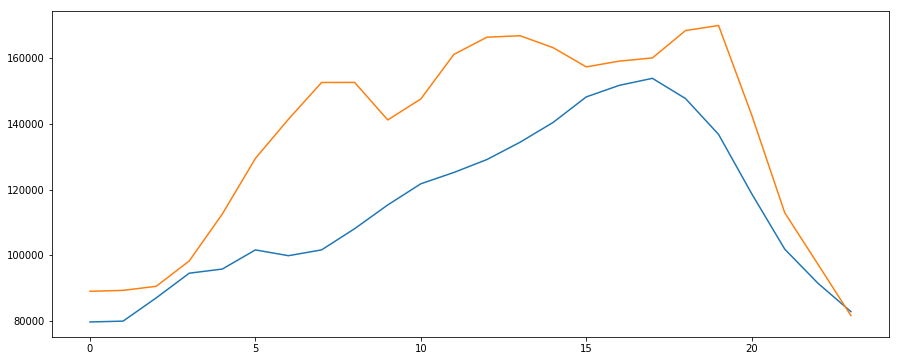

In [96]:
predictAt(48)
predictAt(48 + 24)
predictAt(48 + 48)

In [97]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [98]:
# day - the starting day 
# total_days - the number of days to graph
# delta - the interval between predictions (12 => 1H between pred, 1 => 5min between predictions)
def predict (day=3, total_days=1, delta=1, show_gradual_error=True):
    
    predictions = np.array([])
    true_vals = np.array([])

    for i in range(int((48*total_days/delta))):
        # the point where the model will predict
        point = 48*day + i * delta

        prediction = predictNext2Hours (model, ads[point-look_back:point].reshape(look_back)).reshape(24)

        # plots the predictions
        plt.plot(range(point, point+24),prediction, color="red", alpha=0.1)

        predictions = np.append(predictions, prediction)
        true_vals = np.append(true_vals,ads[i:i+24]) 

    predictions = predictions.reshape(int(len(predictions)/24), 24)
    true_vals = true_vals.reshape(int(len(true_vals)/24), 24)
    
    print("%.2f RMSE" % (mean_absolute_percentage_error(true_vals, predictions)))
    
    plt.plot(range(48*day,48*day+48*total_days),ads[48*day:48*day+48*total_days,0])
    plt.show()
    
    if show_gradual_error:
        err = np.array(range(24)).astype('float32')
        for i in range(look_forward):
            # calc RMSE
            err[i] = math.sqrt(mean_squared_error(true_vals[:,i],predictions[:,i]))
            # calc individial errors
            indiv_err = abs(true_vals[:,i] - predictions[:,i])
            indiv_err.sort()
            plt.scatter(np.ones(len(indiv_err))*i,indiv_err, color='black',alpha=0.1)
            
        plt.plot(err)
        
        plt.show()

In [ ]:
#Prima Facie The Score is Much Worse

9.24 RMSE


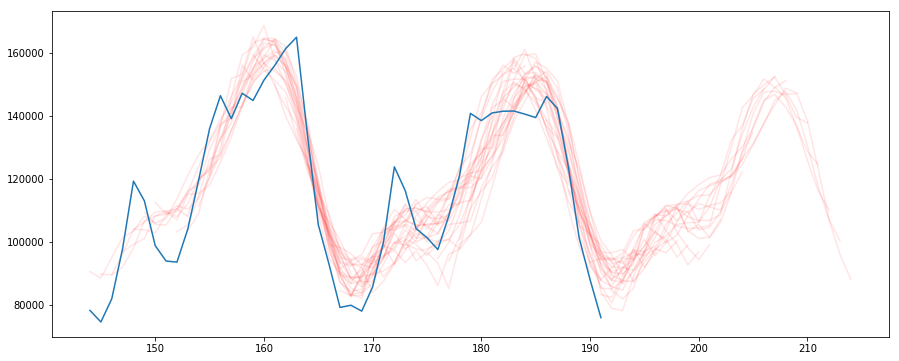

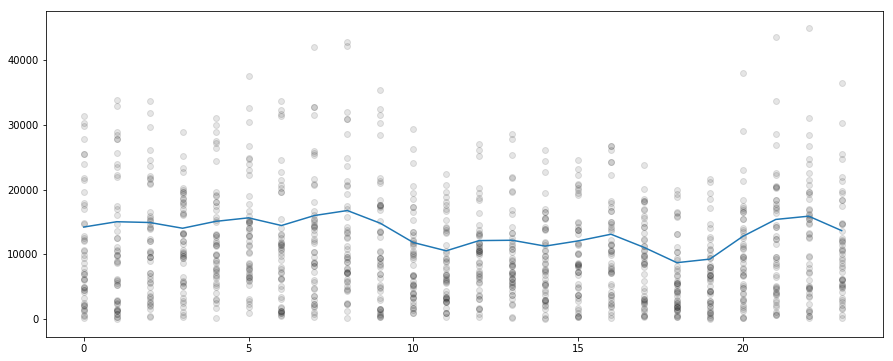

In [99]:
predict()